### **1. Conceito explorado: MSE - Mean Square Error**

Considere o seguinte modelo de geração de dados mostrado abaixo:
$$
y = h(x) +ε (1.2)
$$

Nesse modelo, h(x) = 3x+30 consiste na função hipótese verdadeira, muitas vezes desconhecida na prática de ML, e ε é um termo que expressa a incerteza entre os valores da função hipótese verdadeira e a variável de saída ou resposta y. Estatisticamente, **ε** é interpretado como um ruído, que nesse exercício segue a distribuição de probabilidade Gaussiana com média µ = 0 e desvio padrão σ = 15. A notação em negrito usada ocorre em função de (1.3) ser um modelo vetorial de dados.

A variável explanatória x usada será um vetor de valores inteiros de zero (1) a cem (100). Logo, o modelo de dados é formado pelos vetores y, h(x) e ε, sendo cada um com dimensões (número de linhas e colunas) de 100×1.

Considere que um grupo de cientistas de dados já realizaram o trabalho de modelagem e encontraram uma função hipótese candidata dada por:
$$
hˆ(x) = 2.8x+32 (1.3)

$$

• 1) Construa esse modelo de geração de dados. Para que seja possível a reprodução de resultados em função do vetor aleatório ε utilize a semente (seed) 123 em seu código.

• 2) Faça um gráfico de dispersão da variável explanatória x com saída conhecida y.

• 3) Obtenha o histograma relacionado com a variável de saída y.

• 4) A equação do MSE é uma métrica de desempenho relacionada com qual tipo de tarefa de aprendizagem de máquina?
>     A equação do MSE (Erro Quadrático Médio) é uma métrica de desempenho relacionada a tarefas de aprendizagem de máquina de regressão. Essa métrica é comumente usada para avaliar a precisão de modelos de regressão, onde a tarefa é prever um valor contínuo (por exemplo, prever o preço de uma casa com base em suas características). O MSE calcula a média dos quadrados das diferenças entre as previsões do modelo (hˆ(xi)) e os valores reais (yi) para cada ponto de dados no conjunto de dados. Quanto menor o valor do MSE, melhor é o desempenho do modelo de regressão.

• 5) Faça a estimação do erro quadrático médio do modelo proposto pelos cientistas.

• 6) Faça uma análise: o modelo proposto é plausível para explicar os dados? De quais fatores esse desempenho depende?
>     O MSE é uma métrica de desempenho comum para tarefas de regressão, indicando a média dos quadrados dos erros. Analisar a plausibilidade do modelo envolve comparar o MSE com outros modelos possíveis e entender a variabilidade nos dados (ruído) e como o modelo captura essa variabilidade.

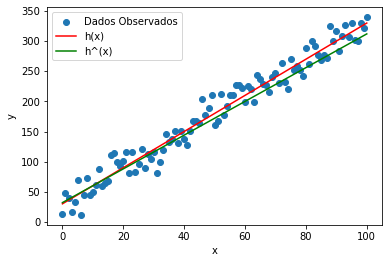

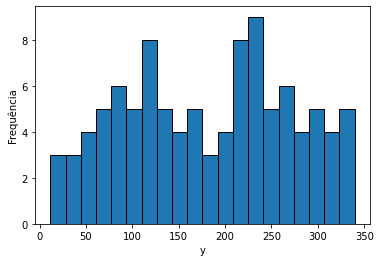

MSE: 393.8521963556062


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal, seed

# Configurando a semente para reprodutibilidade
seed(123)

# Definindo a função hipótese verdadeira h(x) e a função hipótese candidata h^(x)
def h_true(x):
    return 3 * x + 30

def h_candidate(x):
    return 2.8 * x + 32

# Gerando dados
x_values = np.arange(0, 101)
true_values = h_true(x_values)
noise = normal(0, 15, size=len(x_values))
y_values = true_values + noise

# 2) Gráfico de dispersão
plt.scatter(x_values, y_values, label='Dados Observados')
plt.plot(x_values, true_values, color='red', label='h(x)')
plt.plot(x_values, h_candidate(x_values), color='green', label='h^(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# 3) Histograma
plt.hist(y_values, bins=20, edgecolor='black')
plt.xlabel('y')
plt.ylabel('Frequência')
plt.show()

# 5) Estimação do MSE
mse = np.mean((y_values - h_candidate(x_values))**2)
print(f'MSE: {mse}')


### **2. Conceito explorado: MSE - Mean Square Error**

Considere o mesmo modelo de geração de dados do exercício anterior. O objetivo aqui é constatar o impacto do desvio padrão σ sobre a performance do modelo proposto pelos cientistas de dados. Para isso, utilize a geração de números aleatórios com distribuição normal para ε, considerando uma faixa 0 < σ < 20.

Para que seja possível explorar e visualizar o impacto de σ - realize, pelo menos, 1000 iterações do algoritmo. Especificamente, para cada valor de desvio padrão avaliado, armazene e faça o cálculo da média aritmética sobre 1000 valores de performance expressos pelo MSE. Uma dica é utilizar estruturas em loop (for) para a implementação das iterações.

• 1) Construa o modelo de geração de dados incluindo as iterações para cada valor de σ

• 2) Faça um gráfico que mostra o impacto de σ, colocado sobre o eixo x, sobre o desempenho indicado pelo MSE, apresentado no eixo y.

• 3) Faça uma análise: o impacto com o aumento ou redução de σ é significativo para o modelo? Qual a justificativa?
>     O impacto do aumento ou redução de σ é significativo se houver uma mudança substancial no MSE médio. Uma justificativa para o impacto significativo pode ser a sensibilidade do modelo ao ruído. Se o modelo é sensível ao ruído, aumentar σ pode resultar em um aumento significativo nos erros, e vice-versa.

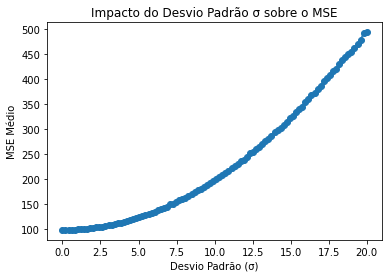

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import normal, seed

# Configurando a semente para reprodutibilidade
seed(123)

# Função para calcular o MSE
def calculate_mse(true_values, predicted_values):
    return np.mean((true_values - predicted_values)**2)

# Configurando parâmetros
num_iterations = 1000
sigma_values = np.linspace(0, 20, 100)  # Valores de σ de 0 a 20

# Inicializando array para armazenar médias dos MSE
mse_means = []

# Gerando dados e calculando MSE para diferentes valores de σ
for sigma in sigma_values:
    mse_values = []
    for _ in range(num_iterations):
        noise = normal(0, sigma, size=len(x_values))
        y_values = true_values + noise
        mse = calculate_mse(y_values, h_candidate(x_values))
        mse_values.append(mse)
    
    mse_mean = np.mean(mse_values)
    mse_means.append(mse_mean)

# 2) Gráfico de impacto de σ sobre o MSE
plt.plot(sigma_values, mse_means, marker='o')
plt.xlabel('Desvio Padrão (σ)')
plt.ylabel('MSE Médio')
plt.title('Impacto do Desvio Padrão σ sobre o MSE')
plt.show()

### **3. Conceito explorado: MSE - Mean Square Error**

Considere o mesmo modelo de geração de dados do exercício anterior. Agora, nosso objetivo é constatar o impacto do número de amostras n sobre a performance do modelo proposto pelos cientistas de dados. De forma similar ao caso anterior, utilize um vetor com o número de amostras n, considerando 10 < n < 100.

Para que seja possível explorar e visualizar o impacto de n - realize, pelo menos, 1000 iterações do algoritmo. Especificamente, para cada valor do número de amostras avaliado, armazene e faça o cálculo da média aritmética sobre 1000 valores de performance, expressos pelo MSE. Uma dica é aproveitar as estruturas em loop (for) do exercício anterior
para a implementação das iterações.

• 1) Construa o modelo de geração de dados incluindo as iterações para cada valor de n.

• 2) Faça um gráfico que mostra o impacto de n, colocado sobre o eixo x, sobre o desempenho indicado pelo MSE, apresentado no eixo y.

• 3) Faça uma análise: o impacto com o aumento ou redução de n é significativo para o modelo? Qual a justificativa?

>     O impacto do aumento ou redução de n é significativo se houver uma mudança substancial no MSE médio. Um menor número de amostras pode resultar em um MSE instável, enquanto um maior número de amostras pode melhorar a estabilidade. Ajustar n é crucial para garantir que o modelo seja treinado e avaliado em conjuntos de dados representativos.

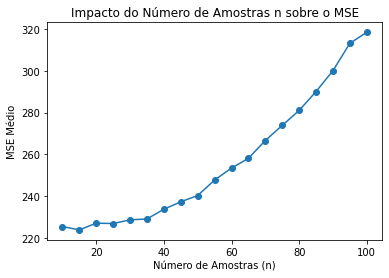

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import normal, seed

# Configurando a semente para reprodutibilidade
seed(123)

# Função para calcular o MSE
def calculate_mse(true_values, predicted_values):
    return np.mean((true_values - predicted_values)**2)

# Configurando parâmetros
num_iterations = 1000
n_values = np.arange(10, 101, 5)  # Valores de n de 10 a 100, incrementando de 5 em 5

# Inicializando array para armazenar médias dos MSE
mse_means = []

# Gerando dados e calculando MSE para diferentes valores de n
for n in n_values:
    mse_values = []
    for _ in range(num_iterations):
        x_values = np.arange(0, n)
        true_values = h_true(x_values)
        noise = normal(0, 15, size=n)
        y_values = true_values + noise
        mse = calculate_mse(y_values, h_candidate(x_values))
        mse_values.append(mse)
    
    mse_mean = np.mean(mse_values)
    mse_means.append(mse_mean)

# 2) Gráfico de impacto de n sobre o MSE
plt.plot(n_values, mse_means, marker='o')
plt.xlabel('Número de Amostras (n)')
plt.ylabel('MSE Médio')
plt.title('Impacto do Número de Amostras n sobre o MSE')
plt.show()
